In [3]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [4]:
hr = pd.read_csv('HR_comma_sep.csv')
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

In [5]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=None)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [6]:
from sklearn.metrics import log_loss


y_pred = dtc.predict(X_test)
y_pred_proba = dtc.predict_proba(X_test)
print(log_loss(y_test, y_pred_proba))

0.9293318055429187


Creating a graphical view of tree

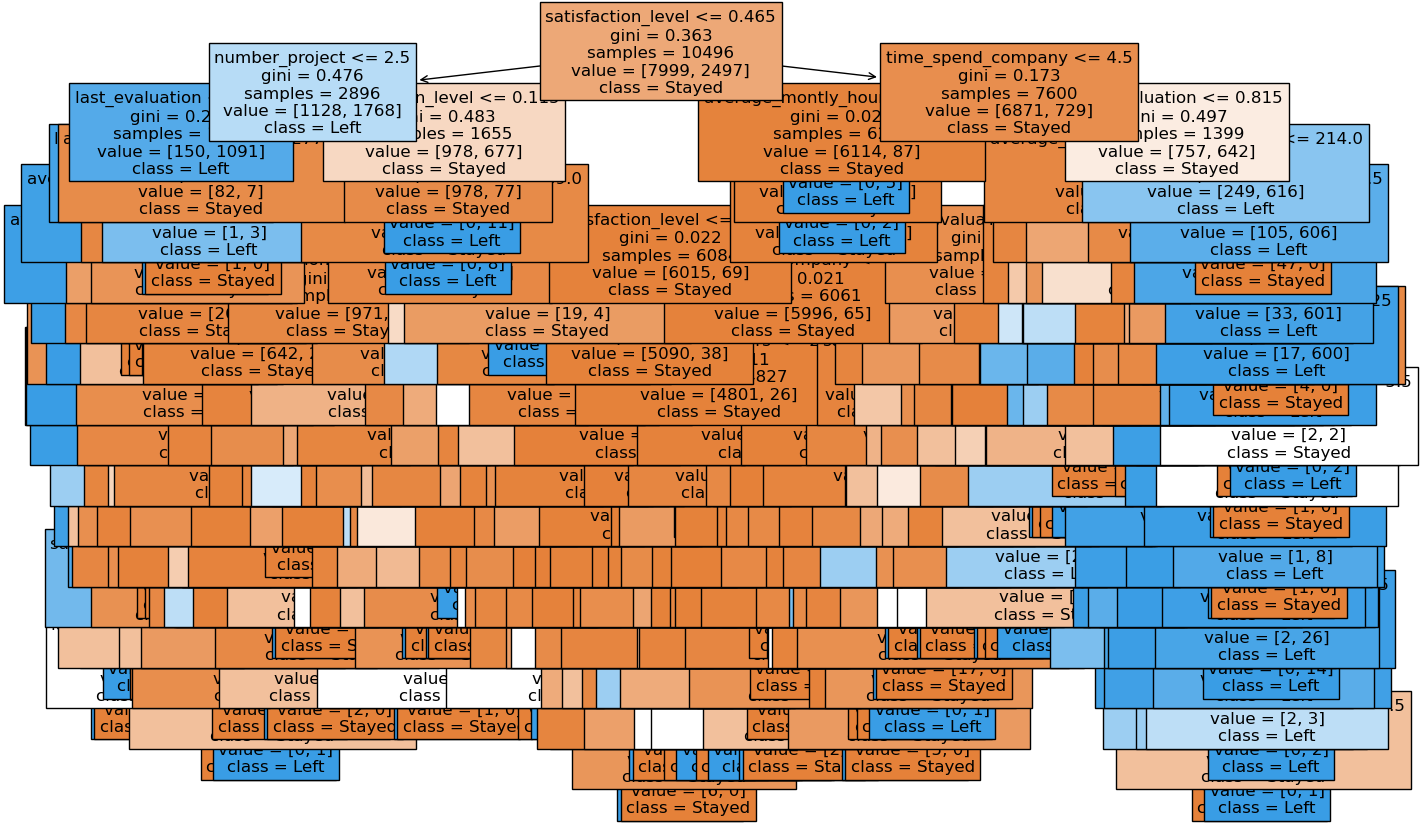

In [7]:
plt.figure(figsize=(15,10))
plot_tree(dtc, feature_names=X_train.columns,class_names=['Stayed','Left'], filled=True, fontsize=12)
plt.show()

In [8]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {'max_depth':[2,3,4,5,6,7,8,9,10,None]}
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, n_jobs=4, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6}
-0.11458681615740332


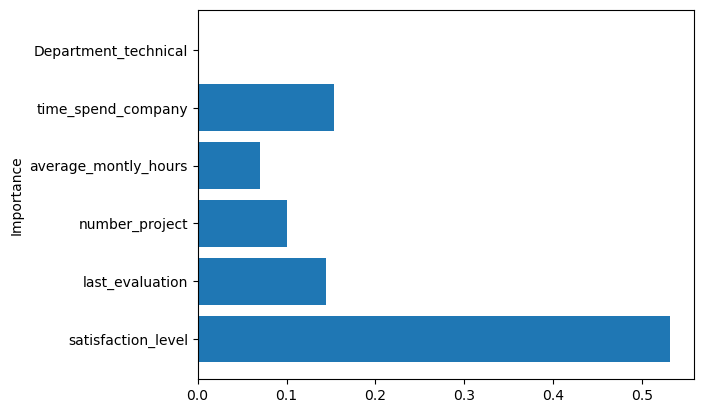

In [14]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=False)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

In [18]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {'max_depth':[2,3,4,5,6,7,8,9,10,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,3,5,7,10,15]}
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, n_jobs=4, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 25}
-0.10203768462086844
